Importing the libraries and dataset. Also taking a look at the dataset.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

slidings = pd.read_csv('Data\slidings_training.csv')
slidings = slidings.drop(columns='Unnamed: 0',axis=1)
slidings.head()

,situation,location,risk,victims,deadly_victims,length,num_points,in_place,sliding,Rain
0,1,1,0,0,0,0,0,0,1,0.60
1,1,1,0,0,0,0,0,0,1,0.60
2,1,1,0,0,0,0,0,0,1,0.13
3,1,1,0,0,0,0,0,0,1,2.17
4,1,1,0,0,0,0,0,0,1,93.60


In [3]:
slidings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45931 entries, 0 to 45930
Data columns (total 10 columns):
situation         45931 non-null int64
location          45931 non-null int64
risk              45931 non-null int64
victims           45931 non-null int64
deadly_victims    45931 non-null int64
length            45931 non-null int64
num_points        45931 non-null int64
in_place          45931 non-null int64
sliding           45931 non-null int64
Rain              45931 non-null float64
dtypes: float64(1), int64(9)
memory usage: 3.5 MB


Again the same analysis as the Gaussian naive bayes notebook but without the situation feature.

In [4]:
random_state = 2
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split


X = slidings.drop(columns={'sliding','situation'},axis=1)
y= slidings['sliding']

model = GaussianNB()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=random_state)

model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

              precision    recall  f1-score   support

           0       0.69      0.85      0.76      6068
           1       0.48      0.27      0.35      3119

    accuracy                           0.65      9187
   macro avg       0.59      0.56      0.56      9187
weighted avg       0.62      0.65      0.62      9187



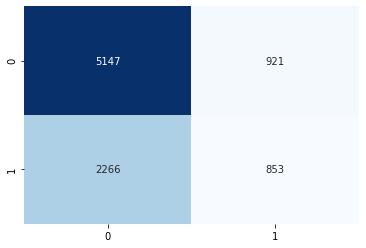

In [5]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
cfm = confusion_matrix(y_test,predictions)
sns.heatmap(cfm, cbar=False, annot=True, cmap='Blues', fmt='d')

In [6]:
model.score(X,y)

0.6607519975615598

In [7]:
from sklearn.model_selection import cross_val_score


scores = cross_val_score(model, X, y, cv=10)
scores

array([0.644101  , 0.6457653 , 0.69257566, 0.67907686, 0.6708034 ,
       0.59808404, 0.68669715, 0.71108208, 0.61920314, 0.67102112])

In [8]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.66 (+/- 0.07)


In [9]:
scores_precision = cross_val_score(model, X, y, cv=10, scoring='precision')
scores_precision

array([0.41815681, 0.37002342, 0.56532663, 0.52023121, 0.50182482,
       0.37149533, 0.54782609, 0.65015974, 0.39534884, 0.50285714])

In [10]:
print("Precision: %0.2f (+/- %0.2f)" % (scores_precision.mean(), scores_precision.std() * 2))

Precision: 0.48 (+/- 0.18)


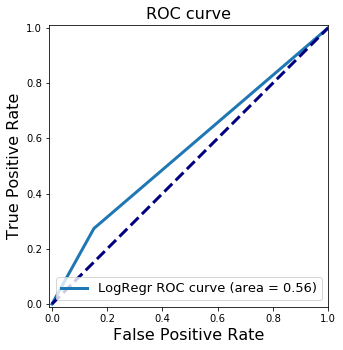

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(5,10))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.gca().set_aspect('equal')
plt.show()

Just like the random forest classifier(RFC) model, the performance of the model drops significantly when we remove the situation feature. So further tests will be done with the RFC model.